# Threshold files

These files are generated by Tom Mote. Details:

* Binary grids of little-endian `int`s
* Shape `(332,316)`
* No header
* At read time, they are scaled by `0.1` and represented as `float`.

## Questions

* What is the data in a threshold file?
* What is its purpose?
* What code generates the file?
* These files are not in a FAIR format. Can they be? E.g. NetCDF with geospatial metadata?

## Reading

### Set up imports

Because we don't currently have a way to install this, we need to add the directory of modules to our path.

In [1]:
import sys
from pathlib import Path

root_dir = Path("").resolve().parent.parent
sys.path.append(str(root_dir / "src"))

### Read data

In [2]:
from read_NSIDC_bin_file import read_NSIDC_bin_file
THRESHOLD_FILE = "./thresh.37h.2021.bin"

thresholds = read_NSIDC_bin_file(THRESHOLD_FILE)

## Plotting

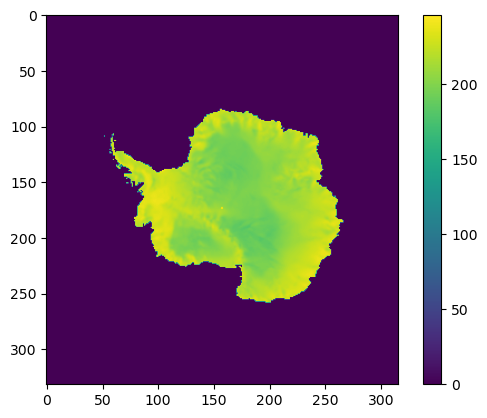

In [3]:
import matplotlib.pyplot as plt

plt.imshow(thresholds)
plt.colorbar()
plt.show()

## `read_NSIDC_bin_file`?

This function takes several parameters, but threshold files are read with the defaults, so we'll focus on that path.

First the data is read in binary mode from the file:

```python
with open(fname, 'rb') as fin:
    raw_data = fin.read()
```

Then it's loaded to an `ndarray`. By default:

* `grid_shape` is `(332, 316)`.
* `return_type` is `float`.
* `element_size` is `2`, meaning each element in the data is 2 bytes.
* `signed` is `False`.


```python
# Creating a uint16 array to read the data in
# NOTE: This is not actually uint16; return_type defaults to float.
int_array = numpy.empty(grid_shape, dtype=return_type)
int_array = int_array.flatten()
    
# Read the data. The built_in "from_bytes" function does the work here.
for i in range(0, int(len(raw_data)/element_size)):
    int_array[i] = int.from_bytes(
        raw_data[(i*element_size):((i+1)*element_size)],
        byteorder="little",
        signed=signed,
    )
                                  
# Unflatten the array back into the grid shape
int_array.shape = grid_shape
```

Finally, the data is scaled. By default, `multiplier` is `0.1`:

```python
return_array = numpy.array( int_array * multiplier, dtype=return_type)
```